# Classifying medicinal vs non-medicinal plants

# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load data

In [2]:
df_classy_counts = pd.read_csv('classyfire_family_vector_counts.csv', sep=',')
df_np_counts = pd.read_csv('np_classifier_family_vector_counts.csv', sep=',')

# Classyfire plant classification

## Data exploration

In [3]:
df_classy_counts.head(3)

,Allyl sulfur compounds,Coumarins and derivatives,Thiosulfinic acid esters,Isocoumarins and derivatives,Oxanes,Organooxygen compounds,Organic disulfides,Benzothiazoles,Benzoxazines,Organobromides,...,Tetrathianes,Sulfoxides,Sulfonyls,Macrolactams,Fatty Acyls,Azoles,Prenol lipids,Pyrrolines,family,ftype
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,13,0,0,0,ncbitaxon:4731,Medicinal
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,1,0,ncbitaxon:4731,Non-medicinal
2,0,0,0,0,0,5,0,0,0,1,...,0,0,0,0,10,0,5,0,ncbitaxon:3487,Medicinal


In [4]:
df_classy_counts.shape

(118, 84)

In [5]:
# Get the frequency of each ftype (medicinal vs non-medicinal plants)
df_classy_counts['ftype'].value_counts()

Medicinal        59
Non-medicinal    59
Name: ftype, dtype: int64

In [6]:
# Get summary stats for each column
df_classy_counts.describe()

,Allyl sulfur compounds,Coumarins and derivatives,Thiosulfinic acid esters,Isocoumarins and derivatives,Oxanes,Organooxygen compounds,Organic disulfides,Benzothiazoles,Benzoxazines,Organobromides,...,Dithianes,Polycyclic hydrocarbons,Tetrathianes,Sulfoxides,Sulfonyls,Macrolactams,Fatty Acyls,Azoles,Prenol lipids,Pyrrolines
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.449153,0.016949,0.194915,0.127119,0.110169,10.169492,0.177966,0.016949,0.008475,0.008475,...,0.016949,0.110169,0.008475,0.440678,0.110169,0.008475,17.050847,0.177966,20.423729,0.033898
std,2.731887,0.129631,1.248989,0.991818,0.364771,18.871724,0.802042,0.129631,0.092057,0.092057,...,0.129631,0.610225,0.092057,1.946034,0.429349,0.092057,29.435094,0.482716,42.766391,0.223882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,6.500000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,10.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,14.000000,0.000000
max,28.000000,1.000000,13.000000,10.000000,2.000000,113.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,6.000000,1.000000,17.000000,2.000000,1.000000,197.000000,2.000000,272.000000,2.000000


In [7]:
# Drop columns where all values are 0
df_classy_counts = df_classy_counts.loc[:, (df_classy_counts != 0).any(axis=0)]

In [8]:
df_classy_counts.shape

(118, 78)

<ipython-input-9-8968b9873102>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_classy_counts.corr(), cmap='viridis', figsize=(20, 20))


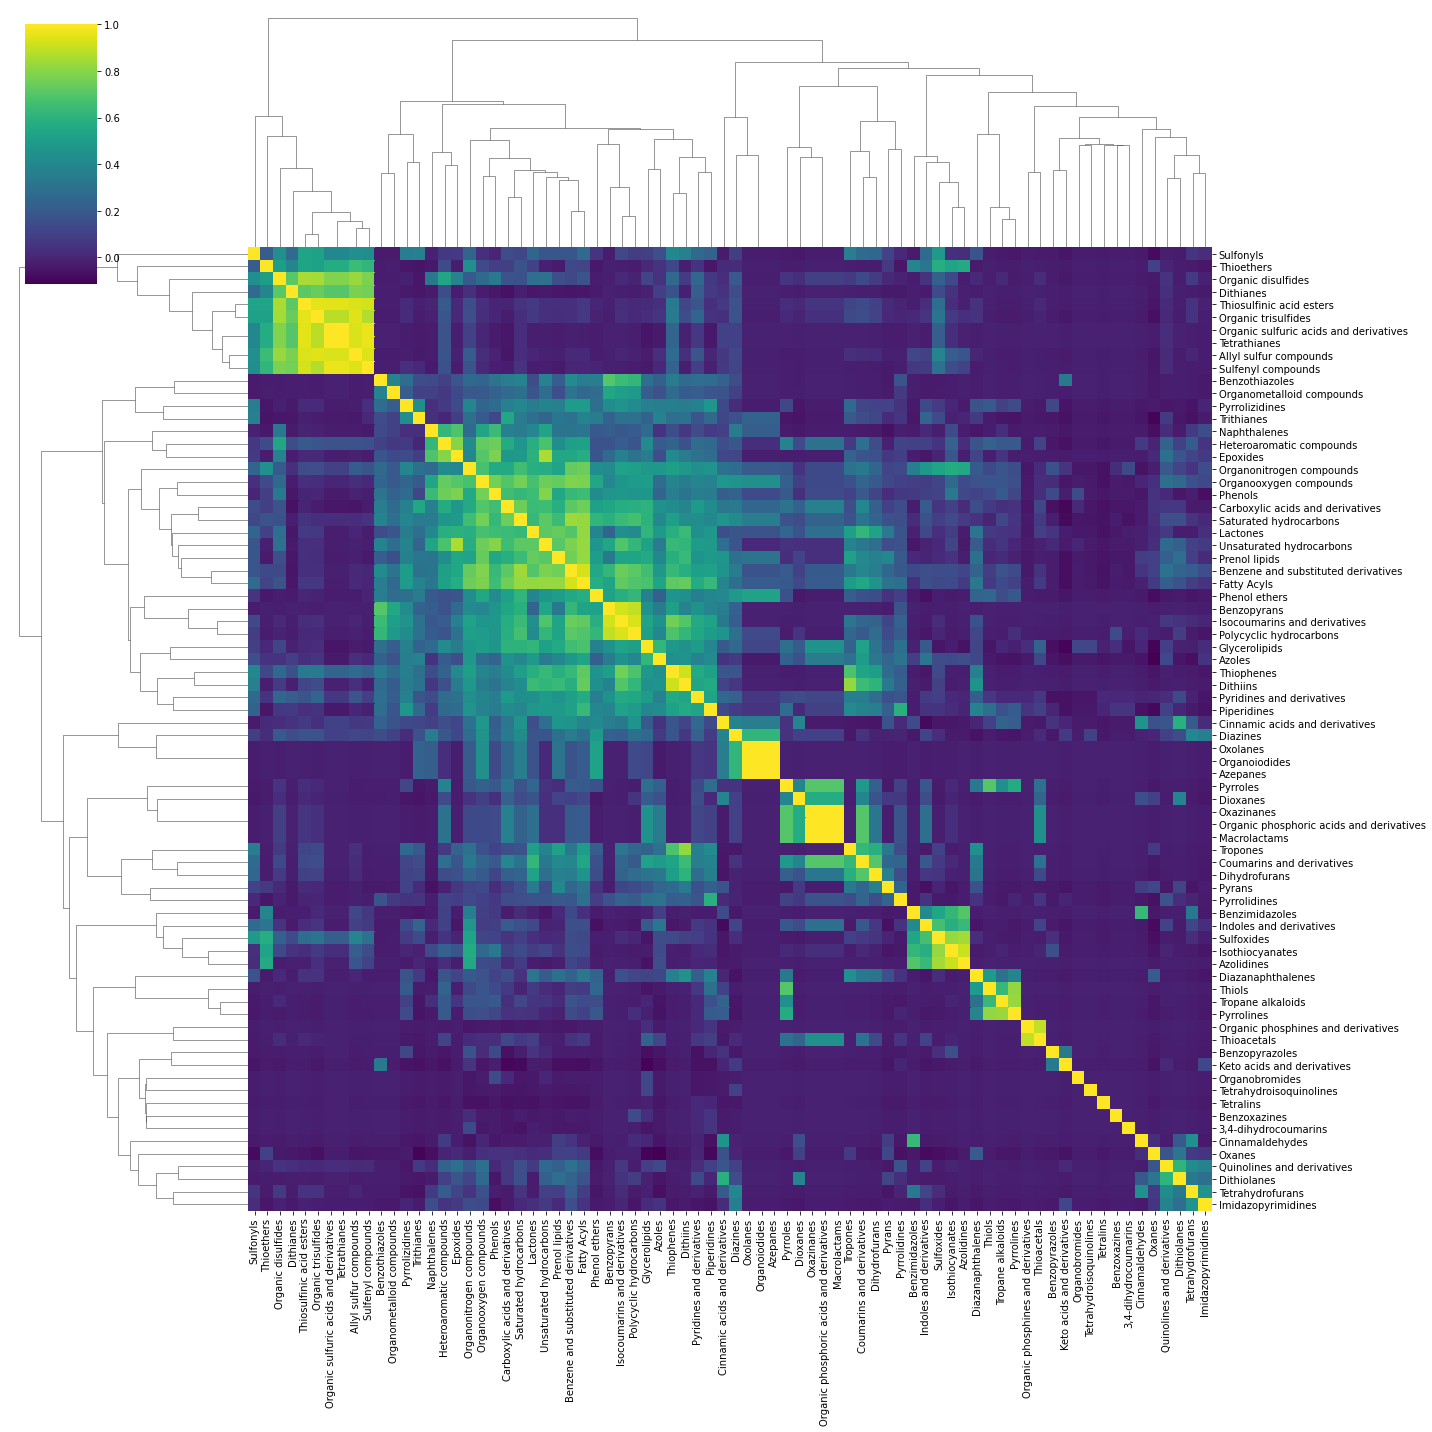

In [9]:
# Data viz
sns.clustermap(df_classy_counts.corr(), cmap='viridis', figsize=(20, 20))

## Build model

In [10]:
# Separate data into features and target
input_features_cf = df_classy_counts.drop(['ftype', 'family'], axis=1)
target_cf = df_classy_counts['ftype']

In [11]:
input_features_cf.head(3)

,Allyl sulfur compounds,Coumarins and derivatives,Thiosulfinic acid esters,Isocoumarins and derivatives,Oxanes,Organooxygen compounds,Organic disulfides,Benzothiazoles,Benzoxazines,Organobromides,...,Dithianes,Polycyclic hydrocarbons,Tetrathianes,Sulfoxides,Sulfonyls,Macrolactams,Fatty Acyls,Azoles,Prenol lipids,Pyrrolines
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,1,0
2,0,0,0,0,0,5,0,0,0,1,...,0,0,0,0,0,0,10,0,5,0


In [12]:
target_cf

0          Medicinal
1      Non-medicinal
2          Medicinal
3      Non-medicinal
4          Medicinal
           ...      
113    Non-medicinal
114        Medicinal
115    Non-medicinal
116        Medicinal
117    Non-medicinal
Name: ftype, Length: 118, dtype: object

In [13]:
# Split data into training and test sets
X_train_cf, X_test_cf, y_train_cf, y_test_cf = train_test_split(input_features_cf, target_cf, test_size=0.2, random_state=5)


In [14]:
# Train model
logistic_regression_cf = LogisticRegression()
logistic_regression_cf.fit(X_train_cf, y_train_cf)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluate model

In [15]:
# Test model
y_pred_cf = logistic_regression_cf.predict(X_test_cf)

In [16]:
# Evaluate model
accuracy_score(y_test_cf, y_pred_cf)

0.5416666666666666

In [17]:
# Predict probability of plant class labels
logistic_regression_cf.predict_proba(X_test_cf)

array([[0.08753696, 0.91246304],
       [0.19264423, 0.80735577],
       [0.42071205, 0.57928795],
       [0.89224723, 0.10775277],
       [0.48088712, 0.51911288],
       [0.48340639, 0.51659361],
       [0.57114305, 0.42885695],
       [0.92140845, 0.07859155],
       [0.78683897, 0.21316103],
       [0.22456519, 0.77543481],
       [0.84552713, 0.15447287],
       [0.99727688, 0.00272312],
       [0.8753037 , 0.1246963 ],
       [0.12068819, 0.87931181],
       [0.54925754, 0.45074246],
       [0.56135351, 0.43864649],
       [0.54932677, 0.45067323],
       [0.01763722, 0.98236278],
       [0.11188793, 0.88811207],
       [0.24400575, 0.75599425],
       [0.22898265, 0.77101735],
       [0.75813702, 0.24186298],
       [0.97424567, 0.02575433],
       [0.35650304, 0.64349696]])

# NP plant classification

## Data exploration

In [18]:
df_np_counts.head(3)

,Tylosins,Lobane diterpenoids,Minor lignans,Noreremophilane sesquiterpenoids,Isocoumarins,Monocyclic monoterpenoids,Cannabinoids,Spriromeroterpenoids,Proanthocyanins,Copaane sesquiterpenoids,...,Gibberellins,Glycerophosphoglycerophosphoglycerols,Carane monoterpenoids,Cephalotaxus alkaloids,Wax diesters,Cycloapotirucallane triterpenoids,Other Docosanoids,Pyranocoumarins,family,ftype
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ncbitaxon:4731,Medicinal
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ncbitaxon:4731,Non-medicinal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ncbitaxon:114201,Medicinal


In [19]:
df_np_counts.shape

(406, 526)

In [20]:
# Get the frequency of each ftype (medicinal vs non-medicinal plants)
df_np_counts['ftype'].value_counts()

Medicinal        203
Non-medicinal    203
Name: ftype, dtype: int64

In [21]:
# Get summary stats for each column
df_np_counts.describe()

,Tylosins,Lobane diterpenoids,Minor lignans,Noreremophilane sesquiterpenoids,Isocoumarins,Monocyclic monoterpenoids,Cannabinoids,Spriromeroterpenoids,Proanthocyanins,Copaane sesquiterpenoids,...,Bourbonane sesquiterpenoids,Aplysiatoxins,Gibberellins,Glycerophosphoglycerophosphoglycerols,Carane monoterpenoids,Cephalotaxus alkaloids,Wax diesters,Cycloapotirucallane triterpenoids,Other Docosanoids,Pyranocoumarins
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,...,406.000000,406.000000,406.000000,406.000000,406.00000,406.00000,406.000000,406.000000,406.000000,406.000000
mean,0.004926,0.007389,0.576355,0.039409,1.423645,9.061576,0.088670,0.014778,3.536946,0.330049,...,0.098522,0.012315,2.036946,0.007389,1.20936,0.23399,0.012315,0.081281,0.002463,1.403941
std,0.099258,0.110865,1.564366,0.269290,5.221781,35.282194,1.112008,0.171495,10.115011,1.119715,...,0.624715,0.248146,9.361920,0.085748,4.46805,4.08453,0.164342,1.243569,0.049629,8.774789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,2.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,12.000000,3.000000,73.000000,341.000000,21.000000,2.000000,102.000000,11.000000,...,9.000000,5.000000,114.000000,1.000000,41.00000,82.00000,3.000000,23.000000,1.000000,115.000000


In [22]:
# Drop columns where all values are 0
df_np_counts = df_np_counts.loc[:, (df_np_counts != 0).any(axis=0)]

In [23]:
df_np_counts.shape

(406, 520)

<ipython-input-24-aff07b5c4378>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_np_counts.corr(), cmap='viridis', figsize=(20, 20))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


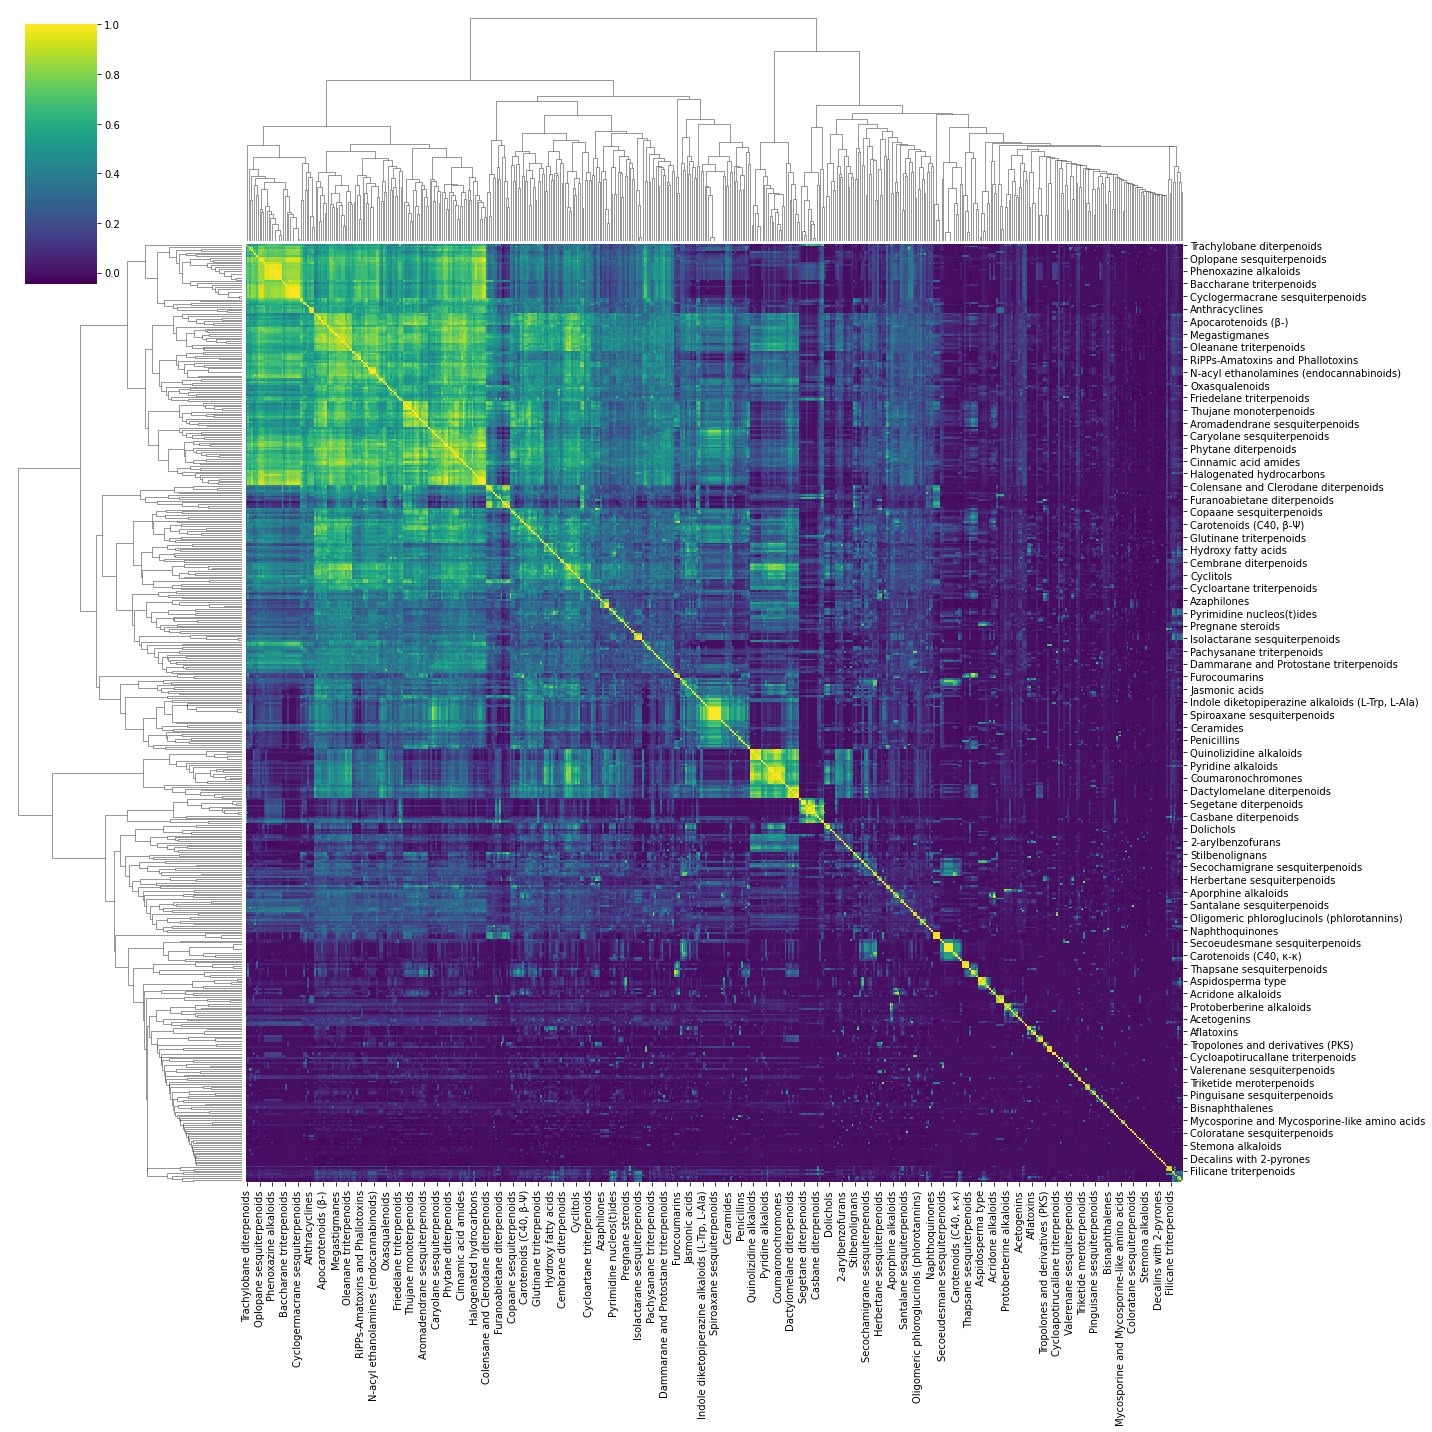

In [24]:
# Visualize correlations between pairs of features
sns.clustermap(df_np_counts.corr(), cmap='viridis', figsize=(20, 20))

## Build model

In [25]:
# Separate data into features and target
input_features_np = df_np_counts.drop(['ftype', 'family'], axis=1)
target_np = df_np_counts['ftype']


In [26]:
input_features_np.head(3)

,Tylosins,Lobane diterpenoids,Minor lignans,Noreremophilane sesquiterpenoids,Isocoumarins,Monocyclic monoterpenoids,Cannabinoids,Spriromeroterpenoids,Proanthocyanins,Copaane sesquiterpenoids,...,Bourbonane sesquiterpenoids,Aplysiatoxins,Gibberellins,Glycerophosphoglycerophosphoglycerols,Carane monoterpenoids,Cephalotaxus alkaloids,Wax diesters,Cycloapotirucallane triterpenoids,Other Docosanoids,Pyranocoumarins
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
target_np

0          Medicinal
1      Non-medicinal
2          Medicinal
3      Non-medicinal
4          Medicinal
           ...      
401    Non-medicinal
402        Medicinal
403    Non-medicinal
404        Medicinal
405    Non-medicinal
Name: ftype, Length: 406, dtype: object

In [28]:
# Split data into training and test sets
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(input_features_np, target_np, test_size=0.2, random_state=5)


In [29]:
# Train model
logistic_regression_np = LogisticRegression()
logistic_regression_np.fit(X_train_np, y_train_np)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluate model

In [30]:
# Test model
y_pred_np = logistic_regression_np.predict(X_test_np)

In [31]:
# Evaluate model
accuracy_score(y_test_np, y_pred_np)

0.5121951219512195

In [32]:
# Predict probability of plant class labels
logistic_regression_np.predict_proba(X_test_np)

array([[2.98589933e-04, 9.99701410e-01],
       [5.87384184e-01, 4.12615816e-01],
       [4.27480965e-01, 5.72519035e-01],
       [9.99265704e-01, 7.34295569e-04],
       [4.48140301e-01, 5.51859699e-01],
       [9.54791801e-15, 1.00000000e+00],
       [9.99986546e-01, 1.34543111e-05],
       [9.12648112e-01, 8.73518879e-02],
       [9.99721372e-01, 2.78628102e-04],
       [2.07809643e-06, 9.99997922e-01],
       [9.97490107e-01, 2.50989284e-03],
       [9.99999365e-01, 6.34617061e-07],
       [4.31154238e-06, 9.99995688e-01],
       [7.01122279e-01, 2.98877721e-01],
       [9.98934339e-01, 1.06566132e-03],
       [7.41925357e-01, 2.58074643e-01],
       [9.44377573e-01, 5.56224271e-02],
       [5.68881661e-01, 4.31118339e-01],
       [1.29814939e-01, 8.70185061e-01],
       [4.75150852e-02, 9.52484915e-01],
       [2.75271932e-01, 7.24728068e-01],
       [9.99944505e-01, 5.54945558e-05],
       [3.56509375e-01, 6.43490625e-01],
       [2.10215246e-01, 7.89784754e-01],
       [4.084955